In [1]:
import pandas as pd

df = pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df.drop(columns='medv')
y = df.medv

print(X.shape)
print(X.columns)

(506, 13)
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split

# Podział: 60% trening, 20% walidacja, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=10)  # 0.25 * 0.8 = 0.2

print("Trening:", X_train.shape)
print("Walidacja:", X_val.shape)
print("Test:", X_test.shape)

Trening: (303, 13)
Walidacja: (101, 13)
Test: (102, 13)


C:\Users\Home\AppData\Local\Temp\ipykernel_13320\2582768626.py:30: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Home\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


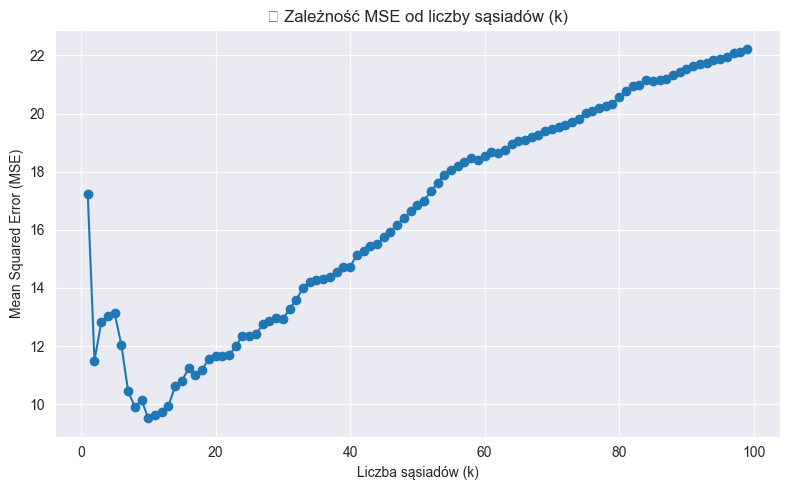

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Sprawdź MSE dla różnych wartości k
mse_scores = []
k_range = range(1, 100)

for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_val = model.predict(X_val_scaled)
    mse = mean_squared_error(y_val, y_pred_val)
    mse_scores.append(mse)

# Wykres
plt.figure(figsize=(8, 5))
plt.plot(k_range, mse_scores, marker='o')
plt.title("📉 Zależność MSE od liczby sąsiadów (k)")
plt.xlabel("Liczba sąsiadów (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_13320\3378666531.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Home\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


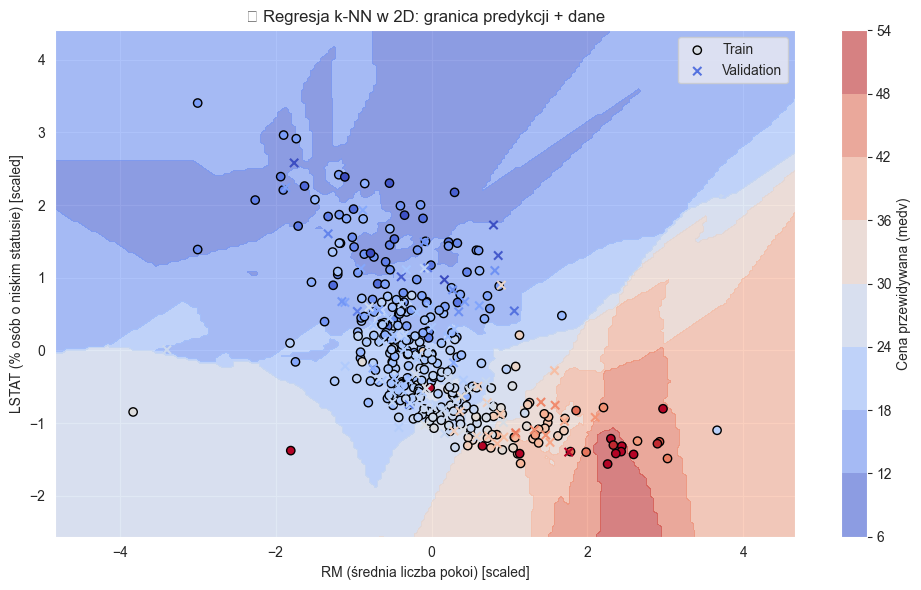

In [13]:
# Wybierz tylko dwie cechy
features = ['rm', 'lstat']
X_train_2d = X_train[features]
X_val_2d = X_val[features]

# Skalowanie
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_val_2d_scaled = scaler_2d.transform(X_val_2d)

# Trening modelu KNN na 2 cechach
knn2d = KNeighborsRegressor(n_neighbors=5)
knn2d.fit(X_train_2d_scaled, y_train)

# Siatka punktów do predykcji (do wizualizacji granicy)
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predykcja na siatce
zz = knn2d.predict(grid_points).reshape(xx.shape)

# Rysuj
plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.6)
plt.colorbar(contour, label="Cena przewidywana (medv)")

# Punkty treningowe
plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', label='Train')
# Punkty walidacyjne
plt.scatter(X_val_2d_scaled[:, 0], X_val_2d_scaled[:, 1], c=y_val, cmap='coolwarm', marker='x', label='Validation')

plt.xlabel("RM (średnia liczba pokoi) [scaled]")
plt.ylabel("LSTAT (% osób o niskim statusie) [scaled]")
plt.title("🔍 Regresja k-NN w 2D: granica predykcji + dane")
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
